In [532]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [533]:
source_img = cv2.imread("../game_screen", cv2.IMREAD_COLOR)

template_img = cv2.imread("../bar.png", cv2.IMREAD_UNCHANGED)

In [535]:
source_img = cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB)
template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(source_img)

plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.imshow(template_img)

plt.show()

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
method_list = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [ ]:
result = cv2.matchTemplate(source_img,template_img,cv2.TM_CCOEFF_NORMED)

cv2.imshow('Result',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

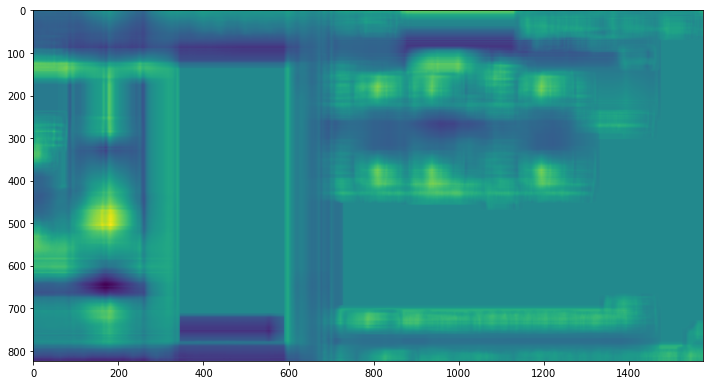

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(result)
plt.show()

In [ ]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

In [ ]:
width = template_img.shape[1]
height = template_img.shape[0]

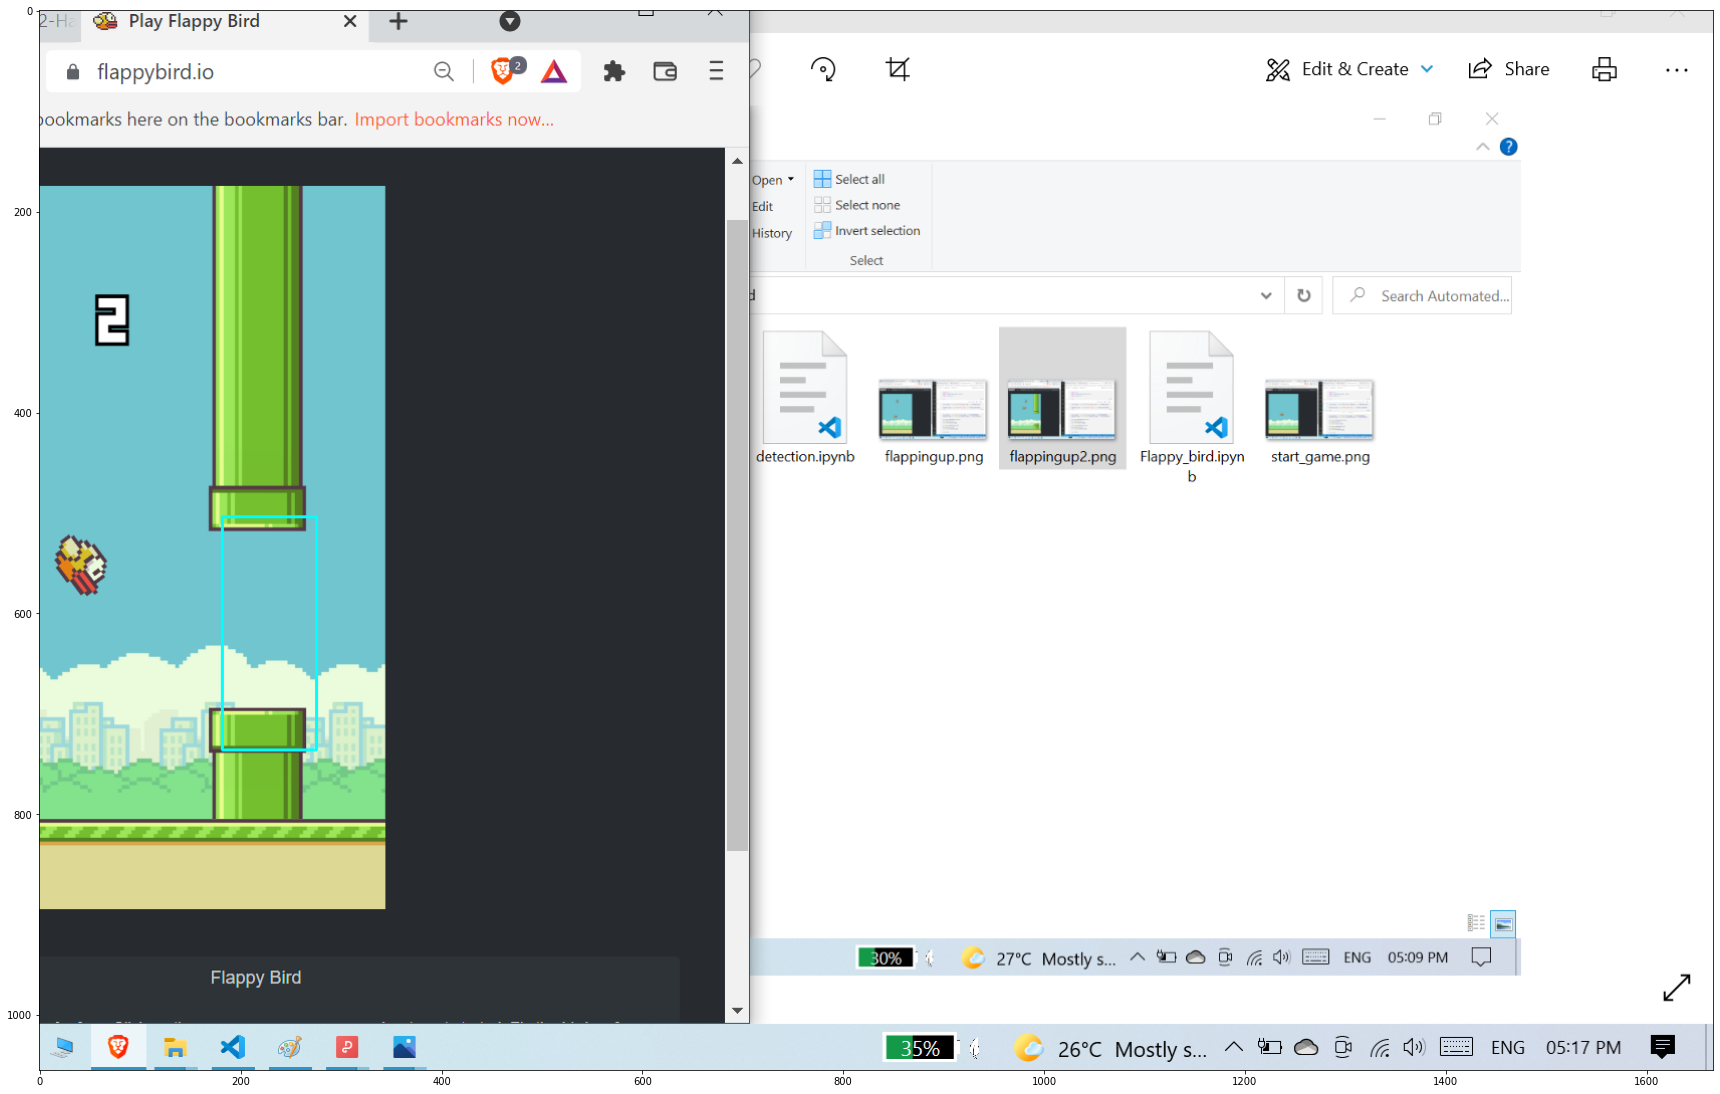

In [ ]:
copy_1 = source_img.copy()
try_img = cv2.rectangle(copy_1, max_loc, (max_loc[0] + width, max_loc[1] + height), (0,255,255), 2)
# First convert the BGR colour of the image into the RGB image.
plt.figure(figsize = (30,50))
plt.imshow(try_img)
try_img = cv2.cvtColor(try_img, cv2.COLOR_BGR2RGB)


cv2.imshow('Final',try_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:


def match(self, screen_img):
        
        # Here we use cv2.TM_CCOEFF_NORMED method, but you have to perform many trials before choosing the perfect method.
        result = cv2.matchTemplate(screen_img, self.image, cv2.TM_CCOEFF_NORMED)
        min_value, max_value, min_loc, max_loc = cv2.minMaxLoc(result)
        
        # Coordinate of the Top Left match template in the screen!
        top_left = max_loc
        
        # Coordinate of the Bottom Right match template in the screen!
        bottom_right = (max_loc[0]+self.width, max_loc[1]+self.height)
        
        # Threshold is the probability of how much the image is similar with other image!
        # Compare it's probability with the desirable threshold!
        if max_value > 0.85 :
            self.location = (top_left, bottom_right)
            return True
        else :
            self.location = None
            return False